<a href="https://colab.research.google.com/github/osmarbraz/exemplos_gensim/blob/master/Exemplo_Gensim_en_GoogleNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo Word Embedding(en) usando Gensim e Google News em Inglês(en)

Exemplo de embendding usando Gensim Python Library com execução através do Google Colaboratory.<br>
É Biblioteca open-source para modelagem de tópicos não supervisionados e processamento de linguagem.
Implementado em Python e Cython. 
Projetado para lidar com grandes volumes de texto, usando fluxo de dados e algoritmos on-line incrementais. 
Seu diferencial em relação a maioria dos outros software para aprendizado de máquina os quais visam apenas o processamento em memória.<br>
https://radimrehurek.com/gensim/





# Preparação do ambiente
Preparação do ambiente para executar o gensim.

##Tratamento de logs

In [ ]:
#Biblioteca de logging
import logging

#Formato da mensagem
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Parâmetros
Parâmetros da execução do teste

In [ ]:
#Id do arquivo no Google Drive
idArquivo = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'

#Definição do nome do arquivo compactado do modelo
arquivoModeloCompactado = 'GoogleNews-vectors-negative300.bin.gz'

#Definição do nome do arquivo do modelo
arquivoModelo = 'GoogleNews-vectors-negative300.bin.gz'

logging.info('Parâmetros definidos!')

2020-10-09 11:25:32,173 : INFO : Parâmetros definidos!


##Instalação

Instalando o gensim no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".


In [ ]:
pip install -U gensim

     |████████████████████████████████| 24.2MB 172kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


Instando o PyDrive no Google Colaboratory.

No Jupiter Notebook executar através "Anaconda Prompt".

PyDrive é uma biblioteca de manipulação de arquivos para o google drive.<br>

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=7taylj9wpsA2

In [ ]:
 pip install PyDrive

## Bibliotecas

Importando as bibliotecas de manipulação de dos arquivos pydrive.<br>
https://gsuitedevs.github.io/PyDrive/docs/build/html/index.html#


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

#Biblioteca para autenticar o usuário
from google.colab import auth

#Biblioteca para acessar o sistema de arquivos
import os

logging.info('Import realizado!')

2020-10-09 11:25:44,260 : INFO : Import realizado!


## Autenticação do usuário

O usuário precisar conceder  permissão para o **Google Cloud SDK** acessar o seu Google Colaboratory.

Copie o código de autorização da URL apresentada na janela aberta e copie e cole na caixa do código de autorização.

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

## Download
Para usar o Gensim, você pode criar o seu vetor de palavras e treiná-lo ou utilizar um dataset previamente treinado.
Neste apresentação utilizamos o dataset fornecido  em https://github.com/3Top/word2vec-api.<br>
São dados do Google News com:<br>
*   300 dimensões
*   3M vocabulário


Link do arquivo no google drive:
https://drive.google.com/open?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM<br>

O arquivo do download será colocado na pasta "**/content**" do Google Colaboratory.<br> Opcionalmente pode ser feito o download para uma pasta no Google Drive. Neste casou é necessário montar uma pasta no Google Drive no Google Colaboratory para receber o arquivo.<br>

Este arquivo do modelo não precisa ser descompactado.

In [ ]:
#Verifica se o arquivo do modelo existe
if not os.path.exists(arquivoModeloCompactado):  
    #Realiza o download do arquivo
    downloaded = drive.CreateFile({'id':idArquivo})

    #Salva o arquivo no diretório 'content' do colab
    downloaded.GetContentFile(arquivoModeloCompactado)

    logging.info('Arquivo {0} baixado'.format(arquivoModeloCompactado))
else:
    logging.info('Arquivo {0} já existe'.format(arquivoModeloCompactado))

2020-10-09 11:26:13,071 : WARNING : file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFo

Mostra o diretório corrente e seus arquivos.

In [ ]:
!pwd
!ls -la

/content
total 1608476
drwxr-xr-x 1 root root       4096 Oct  9 11:26 .
drwxr-xr-x 1 root root       4096 Oct  9 11:06 ..
-rw-r--r-- 1 root root       2676 Oct  9 11:26 adc.json
drwxr-xr-x 1 root root       4096 Oct  9 11:26 .config
-rw-r--r-- 1 root root 1647046227 Oct  9 11:26 GoogleNews-vectors-negative300.bin.gz
drwxr-xr-x 1 root root       4096 Oct  5 16:31 sample_data


# Prepara o modelo
Carrega as bibliotecas e modelo pré treinado para executar os exemplos.

##Importando as bibliotecas do Gensim
Importa as biblitecas do Gensim para carregar o modelo pré treinado.

In [ ]:
from IPython.display import display, HTML
from jinja2 import Template

import warnings
warnings.filterwarnings('ignore')

import numpy as np  
import gensim
from gensim.models import Word2Vec

logging.info('Import realizado!')

2020-10-09 11:26:42,635 : INFO : Import realizado!


##Carregando o modelo

Carregando o modelo do arquivo compactado.

In [ ]:
model = gensim.models.KeyedVectors.load_word2vec_format(arquivoModeloCompactado, binary=True)
logging.info('Modelo carregado!')

2020-10-09 11:26:42,643 : INFO : loading projection weights from GoogleNews-vectors-negative300.bin.gz
2020-10-09 11:27:35,549 : INFO : loaded (3000000, 300) matrix from GoogleNews-vectors-negative300.bin.gz
2020-10-09 11:27:35,550 : INFO : Modelo carregado!


Mostra alguns dados do modelo carregado.

In [ ]:
print(model)
print('Word2Vec(vocab='+str(len(model.wv.vocab))+', size='+ str(model.wv.vectors.shape)+')')

Word2Vec(vocab=3000000, size=(3000000, 300))


Mostra os dados da palavra king.

Mensagem se não tiver memória suficiente para carregar o modelo:<br>
**MemoryError: Unable to allocate 3.35 GiB for an array with shape (3000000, 300) and data type float32**

In [ ]:
model.most_similar('king')

2020-10-09 11:27:35,565 : INFO : precomputing L2-norms of word weight vectors


[('kings', 0.7138046026229858),
 ('queen', 0.6510956883430481),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159993410110474),
 ('sultan', 0.5864822864532471),
 ('ruler', 0.5797567367553711),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.543294370174408),
 ('throne', 0.5422104597091675)]

##Função de apresentação dos dados
Função para melhorar a apresentação dos dados dos exemplos.

In [ ]:
table_list_template = """ 
<table> 
        <tr>  
           <th>Palavra</th>   
           <th>Similaridade</th>   
        </tr>  
        {% for item in items%}  
        <TR>     
           <TD class="c1">{{item[0]}}</TD>     
           <TD class="c2">{{item[1]}}</TD>   
        </TR>   
        {% endfor %}
</table> 
"""
def most_similar(positive, negative):
    nn = model.most_similar(positive=positive, negative=negative)
    tmpl = Template(table_list_template)
    output_html = tmpl.render(items=nn)
    return HTML(output_html)

logging.info('Função criada')

2020-10-09 11:27:41,470 : INFO : Função criada


# Exemplos

**DICA**:<br>
Para palavras com sinais léxicos, utilizar o caractere "**u**" antes da mesma para codifica-la como utf-8.


## Comparando palavras diferentes

King + Woman – Man = ?

In [ ]:
most_similar(positive=['king','woman'], negative=['man'])


Palavra,Similaridade,queen,0.7118192911148071,monarch,0.6189674139022827,princess,0.5902431011199951,crown_prince,0.5499460697174072,prince,0.5377321243286133,kings,0.5236844420433044,Queen_Consort,0.5235945582389832,queens,0.518113374710083,sultan,0.5098593235015869,monarchy,0.5087411999702454


Queen + Man – Woman = ?

In [ ]:
most_similar(positive=['queen','man'], negative=['woman'])

Palavra,Similaridade,king,0.6958590149879456,kings,0.5950952768325806,queens,0.5838501453399658,monarch,0.5398427248001099,prince,0.5223615169525146,princess,0.5175285935401917,princes,0.49844634532928467,royal,0.4924592971801758,NYC_anglophiles_aflutter,0.4859851002693176,Eugene_Ionesco_absurdist_comedy,0.4784241020679474


Distância entre woman e man

In [ ]:
model.distance('woman', 'man')

0.2335987687110901

# Plotando gráficos

Para plotar um conjunto de palavras execute o script abaixo:

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

def plot_words(words):    
    #Carrega o vetor das palavras a serem plotadas
    vectors = []
    for word in words:    
         vectors.append(model[word])
    #Ajustar um modelo 2D de PCA aos vetores
    pca = PCA(n_components=2)
    resultado = pca.fit_transform(vectors)
    #Criar um gráfico de dispersão da projeção
    pyplot.scatter(resultado[:, 0], resultado[:, 1])
    #Adiciona as palavras no gráfico
    for i in range(len(words)):
        pyplot.annotate(words[i], xy=(resultado[i, 0], resultado[i, 1]))        
    #Mostra o gráfico
    pyplot.show()
logging.info('Função criada')

2020-10-09 11:27:42,437 : INFO : Função criada


O comando abaixo plota o gráfico das palavras especificadas.

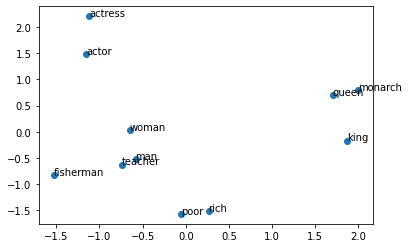

In [ ]:
plot_words(['king', 'queen', 'man', 'woman', 'rich', 'poor', 'monarch', 'fisherman', 'teacher', 'actress', 'actor'])


Lista as palavras do vocabulário

In [ ]:
words = list(model.wv.vocab)
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



##Visualizando o modelo

Aqui tentamos visualizar a conexão entre as seguintes palavras em um subespaço 2D

### Função de visualização

In [ ]:
#Import das bibliotecas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plotar_words(Wl):
    #Carrega o vetor das palavras a serem plotadas
    Wv = []
    for i in range(len(Wl)):
       Wv.append(model[Wl[i]])

    #Queremos um subespaço onde Wv[0]-Wv[1] e Wv[2]-Wv[3] sejam as linhas do eixo, 
    #então essas 4 palavras estão no eixo correspondente
    b1 = (Wv[1]-Wv[0])
    b2 = (Wv[3]-Wv[2])

    #Transforma a lista de embeddings em um vetor simples
    W = np.array(Wv)
    #Transforma as diferenças em um vetor simples
    B = np.array([b1,b2])
    #Calcula o pseudo-inversa de uma matriz
    Bi = np.linalg.pinv(B.T)

    #Multiplica Bi e W.T
    Wp = np.matmul(Bi,W.T)
    #Calcula os pivos
    Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

    #Dimensões da figura
    plt.figure(figsize=(12,7))
    #Adiciona linha vertical
    plt.axvline()
    #Adiciona linha horizontal
    plt.axhline()
    #Criar um gráfico de dispersão da projeção
    plt.scatter(Wp[0,:], Wp[1,:])
    rX = max(Wp[0,:])-min(Wp[0,:])
    rY = max(Wp[1,:])-min(Wp[1,:])
    eps = 0.005
    #Adiciona as palavras no gráfico
    for i, txt in enumerate(Wl):
        plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
    #Mostra o gráfico
    plt.show()

logging.info('Função criada')

2020-10-09 11:27:44,109 : INFO : Função criada


#### Exemplo

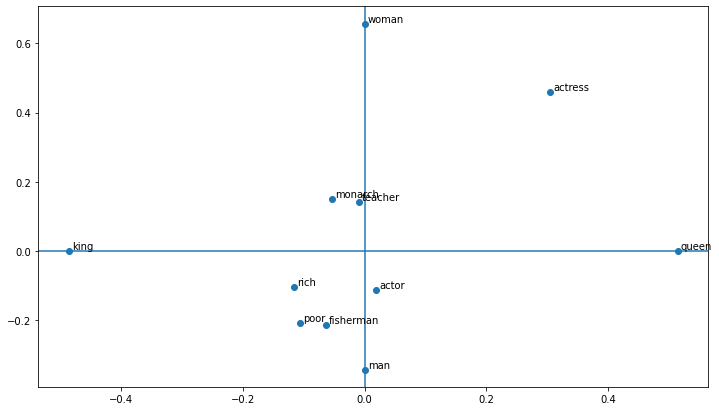

In [ ]:
Wl = ['king', 'queen', 'man', 'woman', 'rich', 'poor', 'monarch', 'fisherman', 'teacher', 'actress', 'actor']

plotar_words(Wl)

#### Detalhamento da função

Import das bibliotecas

In [ ]:
#Import das bibliotecas
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Lista de palavras a serem visualizadas

In [ ]:
#Lista das palavras
Wl = ['king', 'queen', 'man', 'woman', 'rich', 'poor', 'monarch', 'fisherman', 'teacher', 'actress', 'actor']

#Lista dos embeddings das palavras
Wv = []
for i in range(len(Wl)):
    Wv.append(model[Wl[i]])

Queremos um subespaço onde rei-rainha e homem-mulher são as linhas do eixo, então essas 4 palavras estão no eixo correspondente




In [ ]:
#Diferença de Wv[1]-Wv[0]
b1 = (Wv[1]-Wv[0])
#Diferença de Wv[3]-Wv[2]
b2 = (Wv[3]-Wv[2])

Queremos que a base seja (1,0) e (0,1) do espaço projetado. Com uma matriz quadrada, devemos calcular a matriz inversa para obter os vetores base. No entanto, a matriz não quadrada tem apenas pseudo-inversa.

In [ ]:
#Transforma a lista de embeddings em um vetor simples
W = np.array(Wv)
#Transforma as diferenças em um vetor simples
B = np.array([b1,b2])
#Calcula o pseudo-inversa de uma matriz
Bi = np.linalg.pinv(B.T)

In [ ]:
#Mostra as dimensões de B e W
print(B.shape)
print(W.T.shape)

(2, 300)
(300, 11)


Projete todas as incorporações de palavras no subespaço 2D.

  Temos que mudar as linhas rei-rainha e homem-mulher para o eixo.

In [ ]:
#Multiplica Bi e W.T
Wp = np.matmul(Bi,W.T)
print(Wp.shape)
#Calcula os pivos
Wp = (Wp.T-[Wp[0,2],Wp[1,0]]).T

(2, 11)


Vamos colocar as palavras no plano cartesiano!

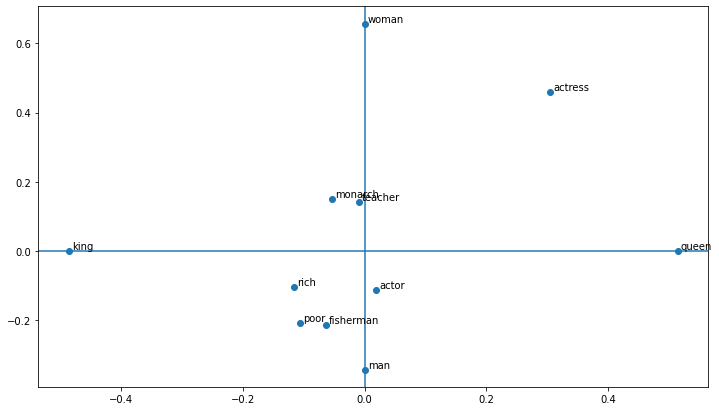

In [ ]:
#Dimensões da figura
plt.figure(figsize=(12,7))
#Adiciona linha vertical
plt.axvline()
#Adiciona linha horizontal
plt.axhline()
#Plota eixo x e y
plt.scatter(Wp[0,:], Wp[1,:])
rX = max(Wp[0,:])-min(Wp[0,:])
rY = max(Wp[1,:])-min(Wp[1,:])
eps = 0.005
#Percore a lista de palavras
for i, txt in enumerate(Wl):
    plt.annotate(txt, (Wp[0,i]+rX*eps, Wp[1,i]+rX*eps))
plt.show()